Author: __Antonio Vecoli__

Date: __03/02/2017__

__Tech For Space__  [www.techforspace.com](https://www.techforspace.com/)

__License :  MIT License__

For technical or Python support, please refer to our [__Project Page__](https://www.techforspace.com/project/sentinels-earth-observation/)

# Short example of Jupyter notebook  for SNAP tutorials 




This Jupyter notebook is a short example for a new interactive approach to create a set of videotutorials that should explain some practical and interesting applications of SNAP, the ESA toolbox for image processing and analysis.
In this particular case a sample dataset of the MERIS sensor will be used, because it has small size and it can be quickly downloaded at this link :

[MERIS sample product](http://www.brockmann-consult.de/beam/data/products/MER_FR__1PNUPA20030723_105132_000000982018_00223_07291_0388.zip)
)

And here is the corresponding image : 

![Meris sample image](http://www.brockmann-consult.de/cms/image/journal/article?img_id=12946&t=1243952893510)





## The Python code




The first step is to import in the code all the Python modules and classes that implement both the SNAP processing and the computational operations.

The *ProductIO* class contains several methods for I/O operations on remote sensing products.
All the remaining imported modules are Python packages for scientific computing(Numpy), image processing(matplotlib and skimage) and file-system handling(os)


In [1]:
from snappy import ProductIO
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from skimage import exposure
import os

print('Modules properly imported')

Modules properly imported


If the **_import_** operations have been successful it is now possible to read the MERIS product dataset.

**The user should have moved the downloaded MERIS file to the current working directory of his Jupyter session.**

After reading the file with the **_readProduct_** method, a list of all the MERIS bands should be visualized.


In [2]:
file_path = os.getcwd()
file_name = 'MER_FR__1PNUPA20030723_105132_000000982018_00223_07291_0388.N1'
p = ProductIO.readProduct(os.getcwd() + "\\" + file_name)
print list(p.getBandNames())


['radiance_1', 'radiance_2', 'radiance_3', 'radiance_4', 'radiance_5', 'radiance_6', 'radiance_7', 'radiance_8', 'radiance_9', 'radiance_10', 'radiance_11', 'radiance_12', 'radiance_13', 'radiance_14', 'radiance_15', 'l1_flags', 'detector_index']


Each available band is named as *radiance* and it is possible to select one of them with the method 
**getBand(_string_ bandName).**
The size of a band image is defined in terms of **width** and **height** , measured in number of pixels.


In [3]:
rad7 = p.getBand('radiance_15')
width = rad7.getRasterWidth()
height = rad7.getRasterHeight()
print('Width = ' + str(width))
print('Height = ' + str(height))

Width = 2241
Height = 2241


Now the pixel values can be extracted from the MERIS product and moved into a proper Numpy bidimensional array that will be our selected Python image. This operation must be implemented in three steps:

1) the numpy array has to be initialized as a monodimensional array instead of a matrix, as we could have expected. This is a requirement of the SNAP method that will extract the pixel values. The data type must be a float type , as required in the SNAP method definition,even if the product data type is _16-bit integer_ 



In [4]:
rad_data_7 = np.zeros(width*height, dtype = np.float32)
print('The array has been initialized')

The array has been initialized


2) Once the numpy array has been properly initialized, the band pixel values will be read and assigned to it by the **_readPixels_** method, according to its definition that can be found [here](http://step.esa.int/docs/v4.0/apidoc/engine/org/esa/snap/core/datamodel/RasterDataNode.html#readPixels-int-int-int-int-float:A-)

In [5]:
rad7.readPixels( 0, 0, height, width, rad_data_7)
print('Reading data...')

Reading data...


3) At this point the numpy array has been completely assigned and now a reshaping operation is necessary to obtain the bidimensional structure that is typical of an image.

In [6]:
rad_data_7.shape = width, height
print('raster image ready to be displayed')

raster image ready to be displayed


The image will be displayed using the matplotlib package

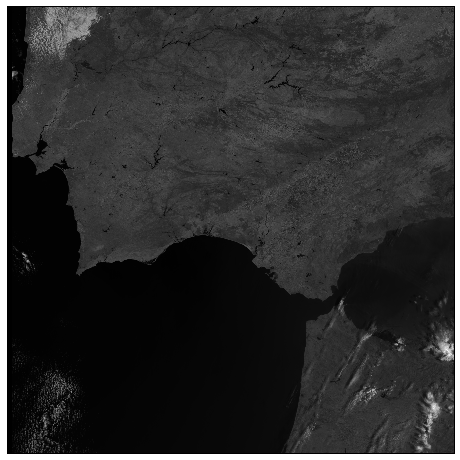

In [7]:
plt.figure(figsize=(8, 8))
fig = plt.imshow(rad_data_7, cmap = cm.gray)  #matplotlib settings for the current image
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()


The image visualization can be improved by applying a contrast enhancing technique that is implemented in the _skimage_ module. This technique is called _histogram equalization_. 

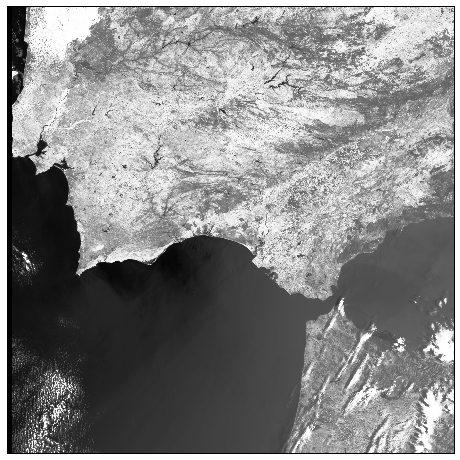

In [8]:
plt.figure(figsize=(8, 8))  
fig = plt.imshow(exposure.equalize_hist(rad_data_7),cmap = cm.gray)
fig.axes.get_xaxis().set_visible(False)  #matplotlib settings for the current figure
fig.axes.get_yaxis().set_visible(False)
plt.show()

Band 7(664.64nm) is one of the MERIS channels that are used for vegetation detection and analysis because of their specific spectral behaviour.
Besides a single band visualization, it can be interesting 

So the first step is to select the three bands that should correspond to the Red, Green and Blue channels. This is the same operation that have been implemented to extract the band 7, but it must be repeated for each of the three channels

In [9]:
B_rad = p.getBand('radiance_2')
B_rad_data = np.zeros(width*height, dtype = np.float32)
B_rad.readPixels( 0, 0, height, width, B_rad_data)
B_rad_data.shape = width, height
print('Blue channel ready')

G_rad = p.getBand('radiance_3')
G_rad_data = np.zeros(width*height, dtype = np.float32)
G_rad.readPixels( 0, 0, height, width, G_rad_data)
G_rad_data.shape = width, height
print('Green channel ready')

R_rad = p.getBand('radiance_4')
R_rad_data = np.zeros(width*height, dtype = np.float32)
R_rad.readPixels( 0, 0, height, width, R_rad_data)
R_rad_data.shape = width, height
print('Red channel ready')


Blue channel ready
Green channel ready
Red channel ready


Now the three channels are finally available and it is possible to create our version of an RGB image. In Python an RGB image can be obtained with a 3-dimensional numpy array where each layer will be assigned to one of the three channels, in the right order. It will be also necessary to operate a contrast enhancement to get a proper visualization of the scene. Instead of the histogram equalization approach, in this case for each channel the pixel intensities will be rescaled according to a low and a high saturation thresholds, both expressed as percentages of the total number of pixels.

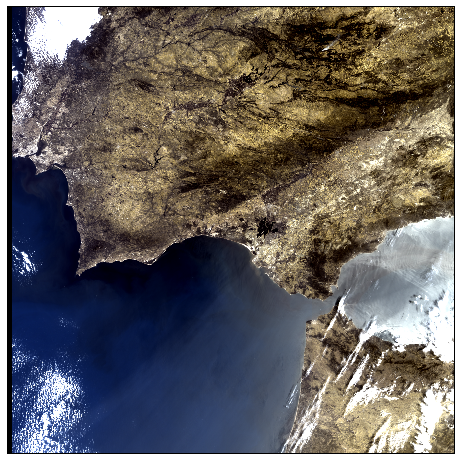

In [10]:
cube = np.zeros((width,height,3), dtype = np.float32)

val1,val2 = np.percentile(B_rad_data, (4,95))
sat_B_rad_data = exposure.rescale_intensity(B_rad_data, in_range=(val1,val2))

val1,val2 = np.percentile(G_rad_data, (4,95))
sat_G_rad_data = exposure.rescale_intensity(G_rad_data, in_range=(val1,val2))

val1,val2 = np.percentile(R_rad_data, (4,95))
sat_R_rad_data = exposure.rescale_intensity(R_rad_data, in_range=(val1,val2))

cube[:,:,0] =sat_R_rad_data
cube[:,:,1] =sat_G_rad_data
cube[:,:,2] =sat_B_rad_data

plt.figure(figsize=(8, 8))
fig = plt.imshow(cube)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()



The same result could be obtained with the desktop version of SNAP by selecting the LANDSAT-TM(4-3-2)  modality in the RGB-image menu.  The reason of this choice is only that the combination of the channels is particularly simple and so it could have been more effective for a short example.

__Credits__:

[Esa STEP](http://step.esa.int/main/) 

[Brockmann Consult](http://www.brockmann-consult.de/cms/web/beam/)